In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import date
import csv
import os
import json
import urllib.request
import pandas as pd
from datetime import date
import time

# pass headers in a dict to the headers parameter to mimic a real human doing the request using a web browser
headers = {
    'accept': '*/*',
    'content-type': 'text/html;charset=UTF-8',
    'content-encoding': 'gzip',
    'origin': 'www.tripadvisor.com',
    'User-Agent': '<a href="/useragents/parse/61268322chrome-macos-blink" class="code"><a href="/useragents/parse/61268322chrome-macos-blink" class="code">Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36</a>'
}

In [2]:
# two paranmeters that you can change

num_listing = 1
rental = False

address=[]
price=[]
num_of_bedrooms=[]
num_of_bathrooms=[]
year_built=[]
square_footage=[]
days_on_zillow=[]
num_of_views=[]
h_link=[]

# address.clear()
# price.clear()
# num_of_bedrooms.clear()
# num_of_bathrooms.clear()
# year_built.clear()
# square_footage.clear()
# days_on_zillow.clear()
# num_of_views.clear()
# h_link.clear()

# record when the data is crawled
date_today = date.today()


count = 1
# request link
url = 'https://www.zillow.com/manhattan-new-york-ny-10023/3_p/?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A3%7D%2C%22usersSearchTerm%22%3A%2210023%22%2C%22mapBounds%22%3A%7B%22west%22%3A-74.17299974642711%2C%22east%22%3A-73.9361070462318%2C%22south%22%3A40.74575460870326%2C%22north%22%3A40.88009337254188%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A61637%2C%22regionType%22%3A7%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%7D%2C%22isListVisible%22%3Atrue%7D'.format(count)

# open the url and get a response
r = requests.get(url, headers=headers)

# read the response content with soup
soup = BeautifulSoup(r.content, 'html.parser')


In [3]:
num_listings = 100
crawled_listing = 0
while num_listings > crawled_listing:
    for s1 in soup.find_all('article', {'class':"list-card list-card-additional-attribution list-card-additional-attribution-space list-card_not-saved"}):
        # address
        try:
            address.append(s1.find('address', {'class':'list-card-addr'}).text)
        except Exception:
            address.append('N/A')
        # price
        try:
            price.append(s1.find('div', {'class':'list-card-price'}).text)
        except Exception:
            price.append('N/A')
        # number of bedrooms
        try:
            if s1.find('ul', {'class':"list-card-details"}).find_all('li')[0].text[0]=='S':
                num_of_bedrooms.append('Studio')
            else:
                num_of_bedrooms.append(s1.find('ul', {'class':"list-card-details"}).find_all('li')[0].text[0])
        except Exception:
            num_of_bedrooms.append('N/A')
         # number of bathrooms
        try:
            num_of_bathrooms.append(s1.find('ul', {'class':"list-card-details"}).find_all('li')[1].text[0])
        except Exception:
            num_of_bathrooms.append('N/A')
        # square footage
        try:
            square_footage.append(s1.find('ul', {'class':"list-card-details"}).find_all('li')[2].text[0:-5])
        except Exception:
            square_footage.append('N/A')  
         # sales link
        try:
            h_link.append(s1.find('a', {'class':"list-card-link list-card-link-top-margin"}).get('href'))
        except Exception:
            h_link.append('N/A')
        #print('2')
        if h_link[-1] != 'N/A':
            try:
                r1 = requests.get(h_link[-1], headers=headers)
            except Exception:
                year_built.append('N/A')

            s2 = BeautifulSoup(r1.content, 'html.parser')
            link2 = s2.find('div', {'id':'home-details-content'})
            
            features = link2.find_all('span', {'class':"Text-c11n-8-53-2__sc-aiai24-0 hdp__sc-1esuh59-3 cvftlt hjZqSR"})
            #print(features)
            #times on zillow
            try:
                days_on_zillow.append(link2.find('dl',{'class':'hdp__sc-7d6bsa-0 kTZMwK'}).find_all('dd')[0].text)  
            except Exception:
                days_on_zillow.append('N/A')
            #number of views
            try:
                num_of_views.append(link2.find('dl',{'class':'hdp__sc-7d6bsa-0 kTZMwK'}).find_all('dd')[1].text) 
            except Exception:
                num_of_views.append('N/A')
            
            #year_built
            a=0
            j='null'
            for i in range(0,len(features)):
                if features[i].get('alt')[0] == 'Y':
                    a=1
                    j=i
                    #year_built.append(features[i].text)
                #else:
                    #year_built.append('N/A')         
        else:
            year_built.append('N/A')
            days_on_zillow.append('N/A')
            num_of_views.append("N/A")
        #print(j)
        if a == 1:
            year_built.append(features[j].text)
            
            
        crawled_listing += 1
        if num_listings == crawled_listing:
            break
    #print(count)
    #print('a'+str(len(num_of_views)))
    count+=1
    url = 'https://www.zillow.com/manhattan-new-york-ny-10023/{}_p/'.format(count)
    time.sleep(3)
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
# create a dataframe based on the lists created above
df1 = pd.DataFrame(list(zip(address,price,num_of_bedrooms,num_of_bathrooms,square_footage,year_built,days_on_zillow,num_of_views)),
columns = ['Address','price','num_of_bedrooms','num_of_bathrooms','square_footage','Year Built','Times on Zillow','Number of Views'])

In [5]:
df1.head(50)

,Address,price,num_of_bedrooms,num_of_bathrooms,square_footage,Year Built,Times on Zillow,Number of Views
0,"171 W 73rd St APT 5, New York, NY 10023","$545,000",1,1,650,1910,N/A,N/A
1,"130 W 67th St APT 9G, New York, NY 10023","$740,000",1,1,645,1975,6 days,544
2,"111 W 70th St APT 1-F, New York, NY 10023","$499,000",1,2,--,1910,119 days,"4,676"
3,"123 W 74th St APT 1A, New York, NY 10023","$429,000",1,1,--,1925,N/A,N/A
4,"336 W End Ave APT 4F, New York, NY 10023","$400,000",Studio,1,600,1931,14 days,"1,805"
5,"132 W 71st St APT 9, New York, NY 10023","$539,000",1,1,--,1900,56 days,"3,106"
6,"161 W 61st St #14A-15A, New York, NY 10023","$1,750,000",2,2,"1,167",1988,N/A,N/A
7,"108 W 69th St APT 10, New York, NY 10023","$1,150,000",2,2,"1,100",1900,N/A,N/A
8,"161 W 75th St APT 11F, New York, NY 10023","$1,625,000",2,2,"1,055",1925,6 days,750
9,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [6]:
df1.to_csv('Zillow.csv')

In [18]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
import seaborn as sns

# Matplotlib for visualization
# matplotlib.pyplot -> plt
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

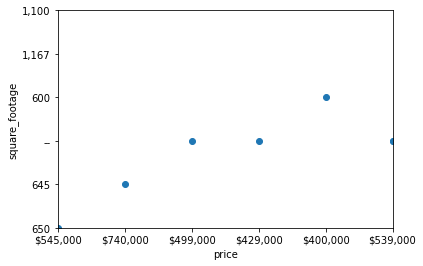

In [24]:
#display the specific number between square_footage and price using scatterplot
df2 = df1.copy()
df2 = df1[df1['price']!='N/A']
df2 = df1[df1['square_footage']!='N/A']

plt.scatter(df2.price, df2.square_footage)
plt.ylabel('square_footage')
plt.xlabel('price')

plt.xlim((0, 5))  
plt.ylim((0, 5))  

plt.show()

<AxesSubplot:xlabel='num_of_bathrooms', ylabel='count'>

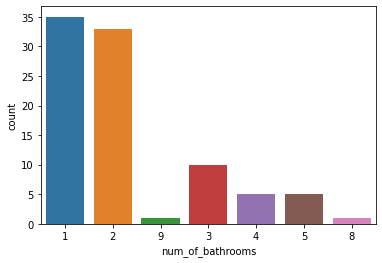

In [14]:
#display the count of number of bathrooms
sns.countplot(x='num_of_bathrooms', data=df2)